# MODEL


In [54]:
import numpy as np
import pandas as pd

In [55]:
X = pd.read_csv('./X.csv')

In [56]:
X.columns

Index(['amoblado', 'amount_max_bs', 'amount_max_usd', 'bathroom', 'baulera',
       'bedroom', 'dimension', 'elevator', 'fee', 'fee_bnb_usd', 'fee_bs',
       'fee_regular', 'fee_regular_bs', 'garage', 'id', 'id_type',
       'id_type_offer', 'latitud', 'longitud', 'pool', 'price', 'status',
       'year_built'],
      dtype='object')

In [57]:
X.head(4)

,amoblado,amount_max_bs,amount_max_usd,bathroom,baulera,bedroom,dimension,elevator,fee,fee_bnb_usd,...,garage,id,id_type,id_type_offer,latitud,longitud,pool,price,status,year_built
0,0,40002059.0,5831204.0,4.0,0,5.0,280,0,1881,NaN,...,4,537418,1,1,-16.521725,-68.060249,0,340000,2,2009.0
1,0,40002059.0,5831204.0,5.0,0,3.0,554,0,2545,NaN,...,5,539099,1,1,-16.514791,-68.058067,0,460000,2,2009.0
2,0,40002059.0,5831204.0,6.0,0,5.0,380,0,1815,2269.53,...,4,451025,1,1,-16.566566,-68.100983,0,328000,2,2015.0
3,0,40002059.0,5831204.0,4.0,0,3.0,271,0,1494,NaN,...,2,537017,1,1,-16.539755,-68.057640,0,270000,2,NaN


In [58]:
X.dtypes

amoblado            int64
amount_max_bs     float64
amount_max_usd    float64
bathroom          float64
baulera             int64
bedroom           float64
dimension           int64
elevator            int64
fee                 int64
fee_bnb_usd       float64
fee_bs              int64
fee_regular         int64
fee_regular_bs      int64
garage              int64
id                  int64
id_type             int64
id_type_offer       int64
latitud           float64
longitud          float64
pool                int64
price               int64
status              int64
year_built        float64
dtype: object

In [59]:
X= X.drop(['amount_max_bs', 'amount_max_usd', 'fee', 'fee_bnb_usd', 'fee_bs','fee_regular', 'fee_regular_bs', 'elevator', 'id_type_offer'], axis = 1)

In [60]:
X.head()

,amoblado,bathroom,baulera,bedroom,dimension,garage,id,id_type,latitud,longitud,pool,price,status,year_built
0,0,4.0,0,5.0,280,4,537418,1,-16.521725,-68.060249,0,340000,2,2009.0
1,0,5.0,0,3.0,554,5,539099,1,-16.514791,-68.058067,0,460000,2,2009.0
2,0,6.0,0,5.0,380,4,451025,1,-16.566566,-68.100983,0,328000,2,2015.0
3,0,4.0,0,3.0,271,2,537017,1,-16.539755,-68.057640,0,270000,2,NaN
4,0,6.0,0,4.0,320,4,539274,1,-16.547251,-68.077873,0,420000,1,NaN


In [61]:
X['price']

0              340000
1              460000
2              328000
3              270000
4              420000
5              600000
6              300000
7              483000
8              285000
9              780000
10             277000
11             390000
12             656000
13             250000
14             220000
15             215000
16             110000
17             220000
18             750000
19             100000
20             630000
21             850000
22             510000
23             465000
24             320000
25             280000
26             370000
27     10000000000000
28             980000
29             395000
            ...      
793               650
794              2200
795              1200
796              2000
797              1200
798              1300
799              2500
800              1600
801              1200
802              4000
803              1800
804              1100
805              1200
806              1000
807       

# BORRANDO FILAS 

### **IMPUTACION**

In [8]:
pd.Series.value_counts

<function pandas.core.base.IndexOpsMixin.value_counts(self, normalize=False, sort=True, ascending=False, bins=None, dropna=True)>

In [9]:
# XX=X

In [10]:
# CON PANDAS, notnull = es un metodo
# apply = reemplaza en los dataframes, en vez de hacer for loop
X.notnull().apply(pd.Series.value_counts)


,amoblado,bathroom,baulera,bedroom,dimension,garage,id,id_type,latitud,longitud,pool,price,status,year_built
False,NaN,9,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,482
True,823.0,814,823.0,814,823.0,823.0,823.0,823.0,823.0,823.0,823.0,823.0,823.0,341


In [11]:
available = ((X != 0) &(X.notnull()))
# revisa todas las lineas, revisa todo sos valores que tengan falsos
#available.all(axis=1)
available.all(axis=1).value_counts()

False    823
dtype: int64

In [12]:
#REVISAR!
((X != 0) & (X.notnull())).price.value_counts()

True    823
Name: price, dtype: int64

In [13]:
from sklearn.preprocessing import Imputer
# tomandola media de las columnas para adicionar alos faltantes
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=1)

/opt/anaconda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
# metodo clasicos en todos los objetos de sckit learn
# REEMPLAZANDO LOS VALORES GRACIAS AL IMPUTER DE SCKIT LEARN
values = imputer.fit_transform(X)

In [15]:
values

array([[0.00000000e+00, 4.00000000e+00, 0.00000000e+00, ...,
        3.40000000e+05, 2.00000000e+00, 2.00900000e+03],
       [0.00000000e+00, 5.00000000e+00, 0.00000000e+00, ...,
        4.60000000e+05, 2.00000000e+00, 2.00900000e+03],
       [0.00000000e+00, 6.00000000e+00, 0.00000000e+00, ...,
        3.28000000e+05, 2.00000000e+00, 2.01500000e+03],
       ...,
       [0.00000000e+00, 4.00000000e+00, 0.00000000e+00, ...,
        2.30000000e+03, 2.00000000e+00, 4.14540313e+04],
       [0.00000000e+00, 4.00000000e+00, 0.00000000e+00, ...,
        6.00000000e+02, 2.00000000e+00, 4.12442589e+04],
       [0.00000000e+00, 2.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+03, 2.00000000e+00, 1.98500000e+03]])

In [16]:
# datos con NaNs...
X.values

array([[0.000e+00, 4.000e+00, 0.000e+00, ..., 3.400e+05, 2.000e+00,
        2.009e+03],
       [0.000e+00, 5.000e+00, 0.000e+00, ..., 4.600e+05, 2.000e+00,
        2.009e+03],
       [0.000e+00, 6.000e+00, 0.000e+00, ..., 3.280e+05, 2.000e+00,
        2.015e+03],
       ...,
       [0.000e+00, 4.000e+00, 0.000e+00, ..., 2.300e+03, 2.000e+00,
              nan],
       [0.000e+00, 4.000e+00, 0.000e+00, ..., 6.000e+02, 2.000e+00,
              nan],
       [0.000e+00, 2.000e+00, 0.000e+00, ..., 1.000e+03, 2.000e+00,
        1.985e+03]])

In [17]:
# llevando este array a un Dataframe
XX = pd.DataFrame(values)

In [18]:
XX.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,4.0,0.0,5.0,280.0,4.0,537418.0,1.0,-16.521725,-68.060249,0.0,340000.0,2.0,2009.000000
1,0.0,5.0,0.0,3.0,554.0,5.0,539099.0,1.0,-16.514791,-68.058067,0.0,460000.0,2.0,2009.000000
2,0.0,6.0,0.0,5.0,380.0,4.0,451025.0,1.0,-16.566566,-68.100983,0.0,328000.0,2.0,2015.000000
3,0.0,4.0,0.0,3.0,271.0,2.0,537017.0,1.0,-16.539755,-68.057640,0.0,270000.0,2.0,62093.492508
4,0.0,6.0,0.0,4.0,320.0,4.0,539274.0,1.0,-16.547251,-68.077873,0.0,420000.0,1.0,73809.644221


In [19]:
DF=XX

In [20]:
DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,4.0,0.0,5.0,280.0,4.0,537418.0,1.0,-16.521725,-68.060249,0.0,340000.0,2.0,2009.000000
1,0.0,5.0,0.0,3.0,554.0,5.0,539099.0,1.0,-16.514791,-68.058067,0.0,460000.0,2.0,2009.000000
2,0.0,6.0,0.0,5.0,380.0,4.0,451025.0,1.0,-16.566566,-68.100983,0.0,328000.0,2.0,2015.000000
3,0.0,4.0,0.0,3.0,271.0,2.0,537017.0,1.0,-16.539755,-68.057640,0.0,270000.0,2.0,62093.492508
4,0.0,6.0,0.0,4.0,320.0,4.0,539274.0,1.0,-16.547251,-68.077873,0.0,420000.0,1.0,73809.644221


### **NO ADDED LABELS TO DATASET**

In [21]:
# X.columns = XX.columns

In [22]:
# X.index = XX.index

In [23]:
Y = DF[11]

In [24]:
Y.head()

0    340000.0
1    460000.0
2    328000.0
3    270000.0
4    420000.0
Name: 11, dtype: float64

In [25]:
DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,4.0,0.0,5.0,280.0,4.0,537418.0,1.0,-16.521725,-68.060249,0.0,340000.0,2.0,2009.000000
1,0.0,5.0,0.0,3.0,554.0,5.0,539099.0,1.0,-16.514791,-68.058067,0.0,460000.0,2.0,2009.000000
2,0.0,6.0,0.0,5.0,380.0,4.0,451025.0,1.0,-16.566566,-68.100983,0.0,328000.0,2.0,2015.000000
3,0.0,4.0,0.0,3.0,271.0,2.0,537017.0,1.0,-16.539755,-68.057640,0.0,270000.0,2.0,62093.492508
4,0.0,6.0,0.0,4.0,320.0,4.0,539274.0,1.0,-16.547251,-68.077873,0.0,420000.0,1.0,73809.644221


In [26]:
# ELIMINANDO LA COLUMNA "price" DE X(dataset)
DF = DF.drop(11, axis = 1)

In [27]:
DF.head()

,0,1,2,3,4,5,6,7,8,9,10,12,13
0,0.0,4.0,0.0,5.0,280.0,4.0,537418.0,1.0,-16.521725,-68.060249,0.0,2.0,2009.000000
1,0.0,5.0,0.0,3.0,554.0,5.0,539099.0,1.0,-16.514791,-68.058067,0.0,2.0,2009.000000
2,0.0,6.0,0.0,5.0,380.0,4.0,451025.0,1.0,-16.566566,-68.100983,0.0,2.0,2015.000000
3,0.0,4.0,0.0,3.0,271.0,2.0,537017.0,1.0,-16.539755,-68.057640,0.0,2.0,62093.492508
4,0.0,6.0,0.0,4.0,320.0,4.0,539274.0,1.0,-16.547251,-68.077873,0.0,1.0,73809.644221


In [28]:
X=DF

In [29]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,12,13
0,0.0,4.0,0.0,5.0,280.0,4.0,537418.0,1.0,-16.521725,-68.060249,0.0,2.0,2009.000000
1,0.0,5.0,0.0,3.0,554.0,5.0,539099.0,1.0,-16.514791,-68.058067,0.0,2.0,2009.000000
2,0.0,6.0,0.0,5.0,380.0,4.0,451025.0,1.0,-16.566566,-68.100983,0.0,2.0,2015.000000
3,0.0,4.0,0.0,3.0,271.0,2.0,537017.0,1.0,-16.539755,-68.057640,0.0,2.0,62093.492508
4,0.0,6.0,0.0,4.0,320.0,4.0,539274.0,1.0,-16.547251,-68.077873,0.0,1.0,73809.644221


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# 60% en train    |   40% en test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5 )

In [32]:
# revisando el tamano de los datos 

# el 60%
print("El TOTAL => ",len(X))
print("EL X_train es 60% =>",len(X_train))

# el 40%
print("EL X_test es 64% =>",len(X_test))

El TOTAL =>  823
EL X_train es 60% => 411
EL X_test es 64% => 412


In [33]:
# revisando el tamano de los datos 

# el 60%
print("El TOTAL => ",len(X))
print("EL X_train es 60% =>",len(X_train))

# el 40%
print("EL X_test es 64% =>",len(X_test))

El TOTAL =>  823
EL X_train es 60% => 411
EL X_test es 64% => 412


In [34]:
X_test.head(2)

,0,1,2,3,4,5,6,7,8,9,10,12,13
296,0.0,4.0,0.0,3.0,216.0,1.0,535386.0,1.0,-16.544928,-68.049110,0.0,2.0,2012.000000
666,0.0,4.0,0.0,4.0,352.0,5.0,405438.0,1.0,-16.529337,-68.080818,0.0,2.0,52747.799219


##  MODELS

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

In [36]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [38]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

-------

In [39]:
# from sklearn.linear_model import Lasso
# lasso = Lasso()

## FITTING = training

In [40]:
lr.fit(X, Y)
# knn.fit(X_train, Y_train)
# svc.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [42]:
predicted = lr.predict(X_test)
# predicted = mlr.predict(X_test)

## PLOTS

In [43]:
# predicted
predicted.shape

(412,)

In [45]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline 

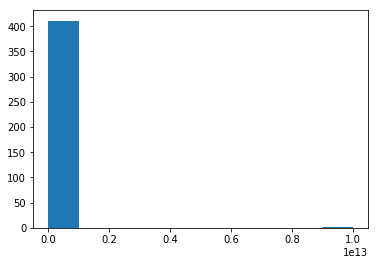

In [46]:
plt.hist([Y_test]);

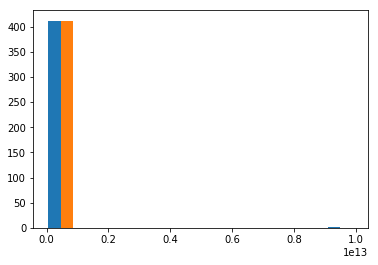

In [47]:
plt.hist([Y_test, predicted]);

In [49]:
# lr.score(X_test, Y_test)

In [51]:
# Y

## Prediction

In [ ]:
y_pred = svc.predict(np.random.random((2,5)))

In [ ]:
_pred = lr.predict(X_test)

In [ ]:
y_pred = knn.predict_proba(X_test))

## METRICS

Evaluate Your Model's Performance
Classification Metrics
Accuracy Score

In [ ]:
knn.score(X_test, y_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)))

In [ ]:
print(cross_val_score(knn, X_train, y_train, cv=4))
print(cross_val_score(lr, X, y, cv=2))

In [ ]:
## LASSO
# lasso.score(X_test, Y_test)

### **STANDARIZATION**

In [75]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
mm_scaler.transform(X_test)

## MinMaxScaler

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

## StandardScaler

## Normalizer

In [33]:
print(X["bedroom"].isnull().sum())

9


In [ ]:
X = imp.fit_transform(X)

In [ ]:
Y = Y.reshape(-1,1)

In [ ]:
Y = imp.fit_transform(Y)

In [ ]:
Y = Y.reshape(-1)

In [ ]:
# Y = X['price']

In [ ]:
Y.head(3)

In [ ]:
# ELIMINANDO LA COLUMNA "price" DE X(dataset)
X = X.drop('price', axis = 1)

In [ ]:
X.head(4)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 60% en train    |   40% en test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5 )

In [ ]:
# revisando el tamano de los datos 

# el 60%
print("El TOTAL => ",len(X))
print("EL X_train es 60% =>",len(X_train))

# el 40%
print("EL X_test es 64% =>",len(X_test))

In [ ]:
# X.var()

In [ ]:
X_test.head(2)